# **PyTorch Neural Network Classification**
## 1. Architecture of a classification neural network
> note: check the ```classification_note.md``` to check the overall architecture description of neural neural network

## 2. Make classification data and get it ready
Here, we can use make_circles() method from scikit-learn to generate two circles with different colored dots

In [2]:
from sklearn.datasets import make_circles

# make 2000 samples
n = 3000

# create circles
X, y = make_circles(n, noise=0.3, # a little bit of noise to the dots 
                    random_state=42) # keep random state with fix sample

In [3]:
# let's view the first 5 x and y values
print(f"First 6 X features: \n{X[:5]}")
print(f"First 5 y values: \n{y[:5]}")

First 6 X features: 
[[-0.15007518  0.58809749]
 [-0.01663532 -1.05424758]
 [ 0.58472714  0.66332259]
 [ 0.38307277  0.86319256]
 [-0.50709044 -0.72126271]]
First 5 y values: 
[1 0 1 0 1]


In [4]:
# Make a Dataframe of circle data
import pandas as pd
circles = pd.DataFrame({"X1": X[:, 0], "X2": X[:, 1], "label": y})
circles.head()

,X1,X2,label
0,-0.150075,0.588097,1
1,-0.016635,-1.054248,0
2,0.584727,0.663323,1
3,0.383073,0.863193,0
4,-0.507090,-0.721263,1


In [5]:
circles.head(10)

,X1,X2,label
0,-0.150075,0.588097,1
1,-0.016635,-1.054248,0
2,0.584727,0.663323,1
3,0.383073,0.863193,0
4,-0.507090,-0.721263,1
5,0.128757,-0.734013,0
6,1.232274,0.252829,0
7,-0.501040,1.104649,1
8,-0.370735,1.617847,0
9,-0.267308,-0.869801,1


In [6]:
# check different labels
circles.label.value_counts()

1    1500
0    1500
Name: label, dtype: int64

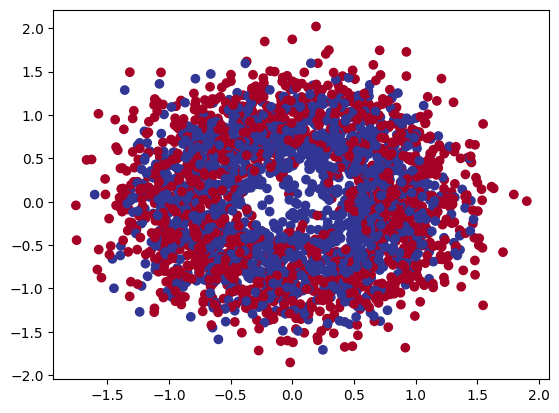

In [7]:
# let's plot the circles

import matplotlib.pyplot as plt
#matplotlib_inline
plt.scatter(x=X[:, 0], y=X[:, 1], c=y, cmap=plt.cm.RdYlBu)

#### 1.1 Input and output shape

In [8]:
# check the shape of our features and labels
X.shape, y.shape

((3000, 2), (3000,))

In [9]:
# View the first example of features and labels
X_sample = X[0]
y_sample = y[0]

print(f"Values for on sample of X: {X_sample} and the same for y: {y_sample}")
print(f"shape for one sample of X: {X_sample.shape} and the same for y: {y_sample.shape}")

Values for on sample of X: [-0.15007518  0.58809749] and the same for y: 1
shape for one sample of X: (2,) and the same for y: ()


#### 1.2 Turn data into tensors and create train and test splits

In [10]:
# Turn data into tensors
# otherwise this cause issues with computations later on

import torch
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# view the first five samples
X[:5], y[:5]

(tensor([[-0.1501,  0.5881],
         [-0.0166, -1.0542],
         [ 0.5847,  0.6633],
         [ 0.3831,  0.8632],
         [-0.5071, -0.7213]]),
 tensor([1., 0., 1., 0., 1.]))

In [11]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

In [12]:
# check the status
print(len(X_train), len(X_test), len(y_train), len(y_test))

2400 600 2400 600


## 3. Build Model

In [14]:
import torch
from torch import nn

# make device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:
# 1. Construct a model class that subclasses nn.Module
class CircleModelv0(nn.Module):
    def __init__(self):
        super().__init__()
        # 2. Create 2 nn.Linear layers capable of handling X and y input shape
        self.layer_1 = nn.Linear(in_features=2, out_features=5) # takes 2 features, produce 5 features
        self.layer_2 = nn.Linear(in_features=5, out_features=1) # takes 5 features, produce 1 feature
    # 3. Define a forward method containing the forword pass computations
    def forward(self, x):
        # Return the output of layer_2, a single feature, the same shape as y
        self.layer_2(self.layer_1(x))

# 4. Create an instance of the model and send it to target device
model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
model_1 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)
model_1

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [17]:
# Make prediction with the model
untrained_preds = model_1(X_test.to(device))
print(f"Length of predictions: {len(untrained_preds)}, shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, shape: {y_test.shape}")
print(f"\nLength of 10 predictions: \n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels: \n{y_test[:10]}")

Length of predictions: 600, shape: torch.Size([600, 1])
Length of test samples: 600, shape: torch.Size([600])

Length of 10 predictions: 
tensor([[-0.3987],
        [-0.5191],
        [-0.3216],
        [-0.2614],
        [-0.5221],
        [-0.3446],
        [-0.4703],
        [-0.3677],
        [-0.5048],
        [-0.2774]], device='cuda:0', grad_fn=<SliceBackward0>)

First 10 test labels: 
tensor([1., 1., 1., 0., 0., 1., 0., 1., 0., 1.])


#### 3.1 Setup loss function and optimizer¶

In [18]:
# create a loss function
# loss_fn = nn.BCELoss() no sigmoid built-in

loss_fn = nn.BCEWithLogitsLoss() # sigmoid built-in

# create optimizer
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [19]:
# Model evaluation matrics and accuracy 
# calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_preds):
    correct = torch.eq(y_true, y_preds).sum().item() # torch.eq() calculate where two tensor a equal
    acc = (correct / len(y_preds)) * 100
    return acc

## 4. Train model